In [18]:
import torch.nn as nn 
import torch
import matplotlib.pyplot as plt 
import time

In [19]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [20]:
device

device(type='cuda', index=0)

In [21]:
net = nn.Sequential(
                    nn.Linear(20, 100), 
                    nn.Linear(100, 500),
                    nn.ReLU(),
                    nn.Linear(500,30),
                    nn.ReLU(),
                    nn.Linear(30,2) )

In [22]:
data = torch.randn((1000, 20))
labels = torch.randint(low = 0, high = 2, size = (1, 1000))

In [11]:
net.to(device)
data = data.to(device)
labels = labels.to(device)

In [23]:
data

tensor([[-2.3487,  0.5377, -1.9761,  ..., -0.4417,  0.9280, -0.0808],
        [-1.0429, -0.9994, -0.3262,  ..., -2.2334, -0.3670,  1.0801],
        [-0.0524,  1.8795, -0.0470,  ...,  1.6715,  2.5358,  0.6328],
        ...,
        [-0.0376, -0.4296,  1.6666,  ...,  1.0916,  0.2840, -0.1178],
        [-0.1797, -0.4650, -0.1265,  ...,  0.5090, -0.7371,  2.7956],
        [ 0.1313, -0.1075, -0.7969,  ...,  1.6184,  1.3861,  0.4193]])

In [24]:
%%time
output = net(data)

CPU times: user 26 ms, sys: 6.8 ms, total: 32.8 ms
Wall time: 45.5 ms


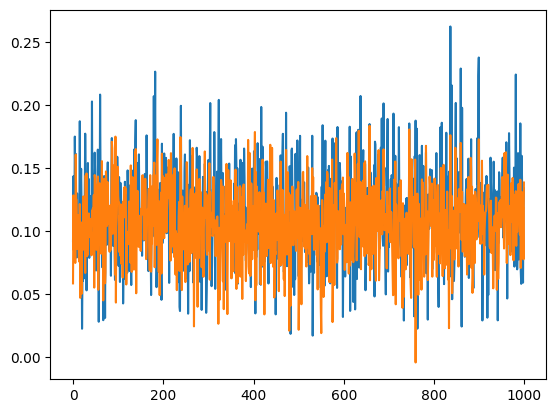

In [15]:
plt.plot(output.detach().cpu())

In [16]:
output

tensor([[0.0923, 0.0587],
        [0.1437, 0.1285],
        [0.0873, 0.0851],
        ...,
        [0.0593, 0.1192],
        [0.1185, 0.0778],
        [0.1342, 0.1387]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [27]:
# start the clock 
starttime = time.process_time()

# move, run, retrieve 
device = 'cuda:0'
net.to(device)
data = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

GPUtime = 1000*(time.process_time() - starttime)

In [28]:
# start the clock 
starttime = time.process_time()

# move, run, retrieve 
device = 'cpu'
net.to(device)
data = data.to(device)
labels = labels.to(device)
output = net(data).detach()

CPUtime = 1000*(time.process_time() - starttime)

In [29]:
[CPUtime, GPUtime]

[9.06066800000005, 3.46493700000039]